# Implementierung Algae Modell

## Bibs und packages 

In [144]:
from copy import deepcopy

using local version


In [158]:
%load_ext autoreload
%autoreload 2 
# from mempyDEB.DEBIBM import test
from mempyDEB.DEBIBM.simulators import * # imports functions to run models
from mempyDEB.DEBIBM.defaultparams import * # imports default parameters
from mempyDEB.DEBIBM.model import * #import model
import mempyDEB
#mempyDEB.__file__

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Tes Algae model alone 

In [159]:
p = deepcopy(defaultparams_DEBIBM)
#p.glb['tspan'] = (0,14)
p.glb['N_0']= 0 #No Daphnia 
p.glb['Pdot_in'] = 0.2
#p.glb['data_collection_interval']=1 #in order to track shorter tie intervalls 
#p.glb['tres']=24

In [160]:
sim = simulate_DEBIBM(p) # runs the baseline model (a variant of DEBkiss)
mout, aout = sim 
mout.head(10) #see results

100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


,index,t_day,X,Q,P,N_tot,M_tot,aging_mortality,starvation_mortality,toxicity_mortality,replicate,C_W
0,0,0.0,2.000000,0.100000,2.000000,0,0.0,0,0,0,0,0.0
1,1,0.0,2.098393,0.096356,1.968220,0,0.0,0,0,0,0,0.0
2,2,3.5,84.180368,0.598093,0.086633,0,0.0,0,0,0,0,0.0
3,3,7.0,178.761454,0.443408,0.005014,0,0.0,0,0,0,0,0.0
4,4,10.5,159.421989,0.401979,0.006250,0,0.0,0,0,0,0,0.0
5,5,14.0,156.075694,0.394886,0.006512,0,0.0,0,0,0,0,0.0
6,6,17.5,155.504778,0.393679,0.006558,0,0.0,0,0,0,0,0.0
7,7,21.0,155.407693,0.393474,0.006566,0,0.0,0,0,0,0,0.0
8,8,24.5,155.391193,0.393439,0.006568,0,0.0,0,0,0,0,0.0
9,9,28.0,155.388389,0.393433,0.006568,0,0.0,0,0,0,0,0.0


Visualize Algae (X), Phosphorus content in the algae population (Q) and extern phosphorus (P). <br> 
Assumptions: <br>
- No Chemichal effect yet, <br>


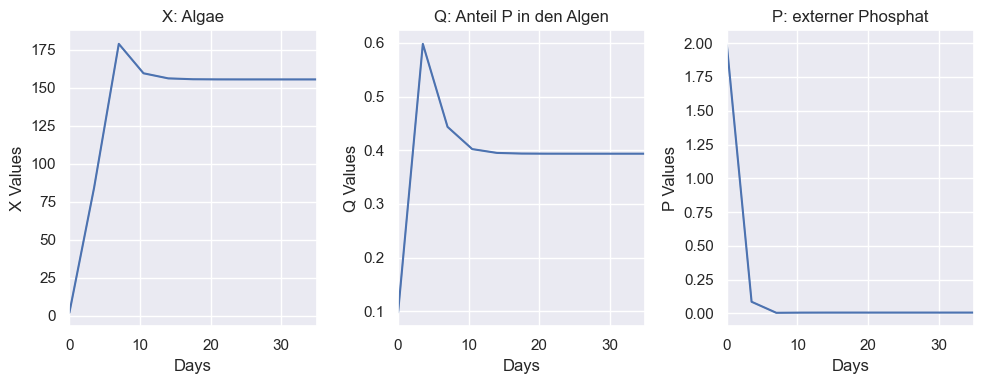

In [163]:
fig, ax = plt.subplots(ncols = 3, figsize = (10,4))

sns.lineplot(data=mout, x='t_day',y='X', ax= ax[0] )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout, x='t_day',y='Q', ax= ax[1] )
ax[1].set_title('Q: Anteil P in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout, x='t_day',y='P', ax= ax[2] )
ax[2].set_title('P: externer Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].set_xlim(0,35)
''' 
sns.lineplot(data=aout, x='t_day',y='S', ax= ax[3] )
ax[3].set_title('P: externer Phosphat')
ax[3].set_xlabel('Days')
ax[3].set_ylabel('P Values')
ax[3].set_xlim(0,35)
'''



plt.tight_layout()
plt.show()

Test and visualize effekt of chemichals in the the algae population: 

In [10]:
C_W_vals = [0, 100, 200, 500] 
sim_chem = exposure_DEBIBM(p, C_W_vals)
mout_c, aout_C = sim_chem 


100%|██████████| 3/3 [00:01<00:00,  2.95it/s]


In [11]:
mout_c

,index,t_day,X,Q,P,N_tot,M_tot,aging_mortality,starvation_mortality,toxicity_mortality,replicate,C_W
0,0,0.0,2.000000,1.000000e+00,2.000000,0,0.0,0,0,0,0,0
1,1,0.0,2.009898,9.959417e-01,1.998641,0,0.0,0,0,0,0,0
2,2,1.0,6.559705,2.969233e-01,1.675839,0,0.0,0,0,0,0,0
3,3,2.0,20.428695,1.908907e-01,1.162527,0,0.0,0,0,0,0,0
4,4,3.0,60.806324,5.709544e-01,0.407086,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26,26,25.0,0.000073,5.564842e-07,0.400009,0,0.0,0,0,0,2,500
27,27,26.0,0.000048,3.208617e-07,0.400005,0,0.0,0,0,0,2,500
28,28,27.0,0.000031,1.850047e-07,0.400003,0,0.0,0,0,0,2,500
29,29,28.0,0.000020,1.066713e-07,0.400002,0,0.0,0,0,0,2,500


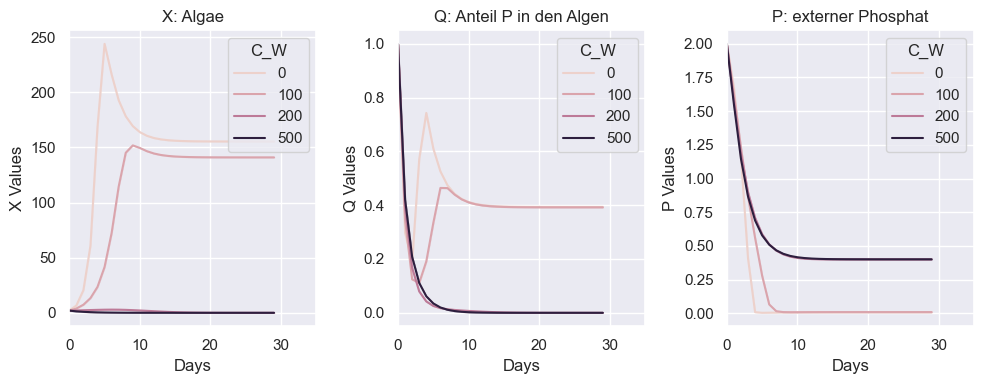

In [12]:
fig, ax = plt.subplots(ncols = 3, figsize = (10,4))

sns.lineplot(data=mout_c, x='t_day',y='X', ax= ax[0], hue='C_W' )
ax[0].set_title('X: Algae')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('X Values')
ax[0].set_xlim(0,35)

sns.lineplot(data=mout_c, x='t_day',y='Q', ax= ax[1], hue='C_W' )
ax[1].set_title('Q: Anteil P in den Algen')
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Q Values')
ax[1].set_xlim(0,35)

sns.lineplot(data=mout_c, x='t_day',y='P', ax= ax[2], hue='C_W' )
ax[2].set_title('P: externer Phosphat')
ax[2].set_xlabel('Days')
ax[2].set_ylabel('P Values')
ax[2].set_xlim(0,35)

plt.tight_layout()
plt.show()

In [164]:
p_da = deepcopy(defaultparams_DEBIBM)

p_da.glb['N_0'] = 10
p_da.glb['Pdot_in'] = 0.2

sim_da = simulate_DEBIBM(p_da) # runs the baseline model (a variant of DEBkiss)
mout_da, aout_da = sim_da 
mout_da.head(10) #see results

100%|██████████| 3/3 [00:06<00:00,  2.04s/it]


,index,t_day,X,Q,P,N_tot,M_tot,aging_mortality,starvation_mortality,toxicity_mortality,replicate,C_W
0,0,0.0,2.000000,0.100000,2.000000,10,0.067500,0,0,0,0,0.0
1,1,0.0,2.098393,0.096356,1.968220,10,0.097156,0,0,0,0,0.0
2,2,3.5,72.007741,0.544398,0.140266,10,1.498348,0,0,0,0,0.0
3,3,7.0,171.587044,0.442984,0.005450,10,11.444163,0,0,0,0,0.0
4,4,10.5,146.906767,0.400833,0.007397,10,22.116438,0,0,0,0,0.0
5,5,14.0,140.534026,0.393305,0.008094,10,28.146357,0,0,0,0,0.0
6,6,17.5,138.406691,0.391883,0.008354,10,31.278482,0,0,0,0,0.0
7,7,21.0,137.524378,0.391573,0.008467,10,32.866818,0,0,0,0,0.0
8,8,24.5,137.115391,0.391486,0.008521,10,33.661177,0,0,0,0,0.0
9,9,28.0,136.917877,0.391454,0.008547,10,34.049089,0,0,0,0,0.0


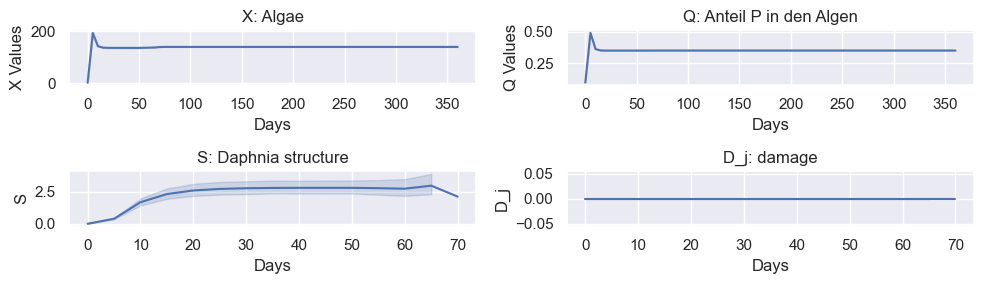

In [ ]:
N0_vals = [10,20,50]

sols = []

# Set up the subplots
fig, ax = plt.subplots(ncols=2, nrows=6, figsize=(10, 9))

for i in N0_vals: 
    p_da.glb['N0'] = i
    


# Configuration for the first row
plot_configs = [
    {'data': mout_ad, 'x': 't_day', 'y': 'X', 'title': 'X: Algae', 'ylabel': 'X Values'},
    {'data': mout_ad, 'x': 't_day', 'y': 'Q', 'title': 'Q: Anteil P in den Algen', 'ylabel': 'Q Values'}
]

# Configuration for the second row
second_row_configs = [
    {'data': aout_ad, 'x': 't_day', 'y': 'S', 'title': 'S: Daphnia structure', 'ylabel': 'S'},
    {'data': aout_ad, 'x': 't_day', 'y': 'D_j', 'title': 'D_j: damage', 'ylabel': 'D_j'},
]


# Iterate over the first row
for i, config in enumerate(plot_configs):
    sns.lineplot(data=config['data'], x=config['x'], y=config['y'], ax=ax[0, i])
    ax[0, i].set_title(config['title'])
    ax[0, i].set_xlabel('Days')
    ax[0, i].set_ylabel(config['ylabel'])
    #ax[0, i].set_xlim(0, 35)


# Iterate over the second row
for i, config in enumerate(second_row_configs):
    sns.lineplot(data=config['data'], x=config['x'], y=config['y'], ax=ax[1, i])
    ax[1, i].set_title(config['title'])
    ax[1, i].set_xlabel('Days')
    ax[1, i].set_ylabel(config['ylabel'])
    #ax[1, i].set_xlim(0, 35)

# Adjust layout and show
plt.tight_layout()
plt.show()

In [167]:
aout_da

,Step,AgentID,t_day,Idot,Adot,Mdot,S,R,X_V,f_X,...,k_M,eta_IA,eta_AR,X_emb,cum_repro,cohort,cause_of_death,mcov,replicate,C_W
0,0,0,0.0,0.000000,0.000000,0.000000,0.006750,0.0,NaN,NaN,...,0.55,0.5,0.95,0.675,0.0,0,0.0,0.000000,0,0.0
1,0,1,0.0,0.000000,0.000000,0.000000,0.006750,0.0,NaN,NaN,...,0.55,0.5,0.95,0.675,0.0,0,0.0,0.000000,0,0.0
2,0,2,0.0,0.000000,0.000000,0.000000,0.006750,0.0,NaN,NaN,...,0.55,0.5,0.95,0.675,0.0,0,0.0,0.000000,0,0.0
3,0,3,0.0,0.000000,0.000000,0.000000,0.006750,0.0,NaN,NaN,...,0.55,0.5,0.95,0.675,0.0,0,0.0,0.000000,0,0.0
4,0,4,0.0,0.000000,0.000000,0.000000,0.006750,0.0,NaN,NaN,...,0.55,0.5,0.95,0.675,0.0,0,0.0,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1513,7,63.0,5.322501,2.661250,2.357198,4.287237,0.0,303.807156,0.377960,...,0.55,0.5,0.95,0.000,0.0,0,0.0,0.037927,2,0.0
180,1513,9,63.0,3.561445,1.780722,1.578365,2.870666,0.0,303.363614,0.377617,...,0.55,0.5,0.95,0.000,0.0,0,0.0,0.024285,2,0.0
181,1513,8,63.0,2.056928,1.028464,0.912233,1.659108,0.0,303.066827,0.377387,...,0.55,0.5,0.95,0.000,0.0,0,0.0,0.013384,2,0.0
182,1597,9,66.5,3.625149,1.812575,1.612635,2.932764,0.0,305.031645,0.378906,...,0.55,0.5,0.95,0.000,0.0,0,0.0,0.018682,2,0.0
